# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
from math import sqrt
import re
import datetime
from sklearn.preprocessing import LabelEncoder

# Reading Data

In [3]:
train=pd.read_csv('F:\Pratik\Big Mart Sales Hackathon//train_kOBLwZA.csv')
test=pd.read_csv('F:\Pratik\Big Mart Sales Hackathon//test_t02dQwI.csv')

# EDA

In [4]:
train.shape

(8523, 12)

In [5]:
test.shape

(5681, 11)

In [6]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
train['Item_Identifier'].value_counts(normalize=True)

FDG33    0.001173
FDW13    0.001173
FDP25    0.001056
FDO19    0.001056
FDF56    0.001056
FDV38    0.001056
DRE49    0.001056
NCY18    0.001056
FDW49    0.001056
FDX31    0.001056
FDF52    0.001056
DRN47    0.001056
NCF42    0.001056
NCB18    0.001056
FDQ40    0.001056
FDX04    0.001056
FDW26    0.001056
FDV60    0.001056
FDU12    0.001056
NCL31    0.001056
NCI54    0.001056
NCJ30    0.001056
FDD38    0.001056
FDT07    0.001056
FDX20    0.001056
FDG09    0.001056
NCQ06    0.001056
FDR04    0.000939
FDP11    0.000939
FDV26    0.000939
           ...   
FDR03    0.000235
FDF38    0.000235
FDD22    0.000235
FDB10    0.000235
FDE39    0.000235
FDB47    0.000235
FDW10    0.000235
FDR57    0.000235
FDG28    0.000235
NCG19    0.000235
NCM42    0.000235
NCV18    0.000235
FDA48    0.000235
FDE38    0.000235
FDU43    0.000235
FDD48    0.000235
FDP15    0.000235
DRG25    0.000235
FDT33    0.000235
NCW05    0.000235
FDZ50    0.000235
FDY43    0.000117
FDE52    0.000117
FDQ60    0.000117
FDT35    0

In [9]:
train['Item_Fat_Content'].value_counts(normalize=True)

Low Fat    0.597090
Regular    0.338965
LF         0.037076
reg        0.013728
low fat    0.013141
Name: Item_Fat_Content, dtype: float64

In [10]:
train['Item_Type'].value_counts(normalize=True)

Fruits and Vegetables    0.144550
Snack Foods              0.140795
Household                0.106770
Frozen Foods             0.100434
Dairy                    0.080019
Canned                   0.076147
Baking Goods             0.076030
Health and Hygiene       0.061011
Soft Drinks              0.052212
Meat                     0.049865
Breads                   0.029450
Hard Drinks              0.025109
Others                   0.019829
Starchy Foods            0.017365
Breakfast                0.012906
Seafood                  0.007509
Name: Item_Type, dtype: float64

In [11]:
train['Outlet_Identifier'].value_counts(normalize=True)

OUT027    0.109703
OUT013    0.109351
OUT046    0.109117
OUT049    0.109117
OUT035    0.109117
OUT045    0.108999
OUT018    0.108882
OUT017    0.108647
OUT010    0.065118
OUT019    0.061950
Name: Outlet_Identifier, dtype: float64

In [12]:
train['Outlet_Size'].value_counts(normalize=True)

Medium    0.456895
Small     0.390643
High      0.152462
Name: Outlet_Size, dtype: float64

In [13]:
train['Outlet_Location_Type'].value_counts(normalize=True)

Tier 3    0.393054
Tier 2    0.326763
Tier 1    0.280183
Name: Outlet_Location_Type, dtype: float64

In [14]:
train['Outlet_Type'].value_counts(normalize=True)

Supermarket Type1    0.654347
Grocery Store        0.127068
Supermarket Type3    0.109703
Supermarket Type2    0.108882
Name: Outlet_Type, dtype: float64

In [15]:
train.shape

(8523, 12)

In [16]:
test.shape

(5681, 11)

In [17]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [18]:
train1=train

In [19]:
train1['Item_Identifier_Encoder']=LabelEncoder().fit_transform(train['Item_Identifier'])
train1['Outlet_Identifier_Encoder']=LabelEncoder().fit_transform(train['Outlet_Identifier'])

In [20]:
train1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier_Encoder,Outlet_Identifier_Encoder
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,156,9
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8,3
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,662,9
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,1121,0
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1297,1


In [21]:
test1=test

In [22]:
test1['Item_Identifier_Encoder']=LabelEncoder().fit_transform(test['Item_Identifier'])
test1['Outlet_Identifier_Encoder']=LabelEncoder().fit_transform(test['Outlet_Identifier'])

In [23]:
test1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Identifier_Encoder,Outlet_Identifier_Encoder
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1103,9
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,1067,2
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,1406,0
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,809,2
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,1184,5


In [24]:
train1['Item_Type_New']=train1['Item_Type']

In [25]:
test1['Item_Type_New']=test1['Item_Type']

In [26]:
train1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier_Encoder,Outlet_Identifier_Encoder,Item_Type_New
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,156,9,Dairy
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8,3,Soft Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,662,9,Meat
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,1121,0,Fruits and Vegetables
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1297,1,Household


# Feature Engineering

In [27]:
train1['Item_Type_New'][train1['Item_Identifier'].str[:2]=='FD']='Food'
train1['Item_Type_New'][train1['Item_Identifier'].str[:2]=='NC']='Non-Consumption'
train1['Item_Type_New'][train1['Item_Identifier'].str[:2]=='DR']='Drinks'

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


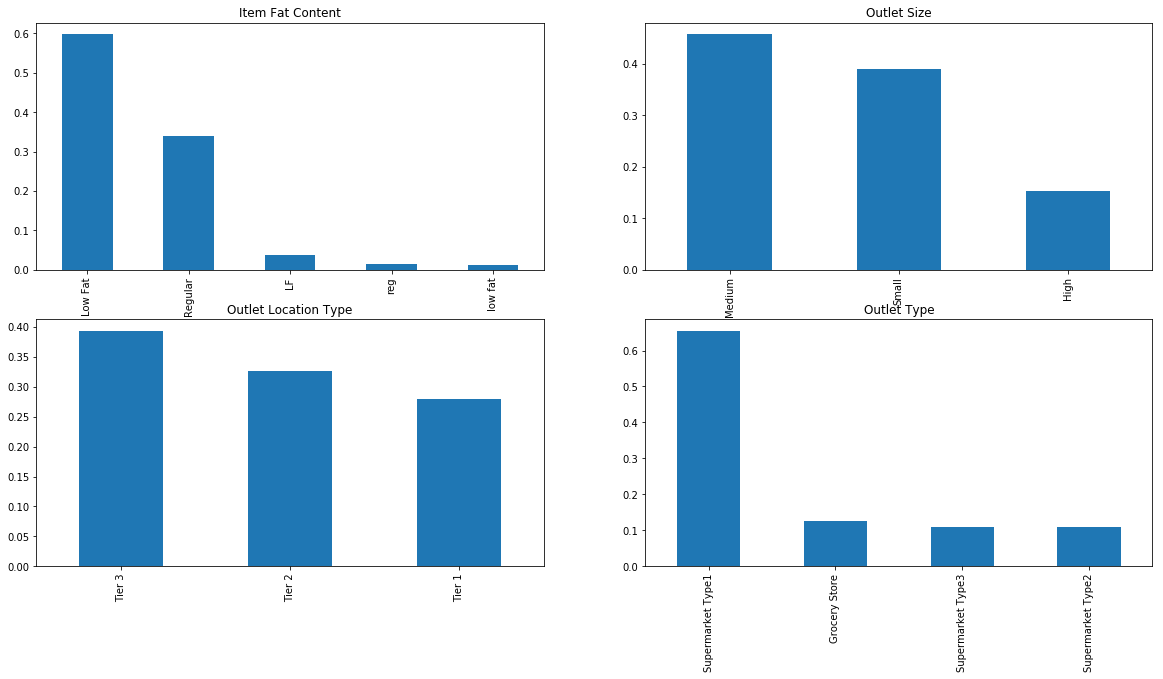

In [28]:
plt.subplot(2,2,1)
train['Item_Fat_Content'].value_counts(normalize = True).plot.bar(figsize = (20,10), title = 'Item Fat Content')
plt.subplot(2,2,2)
train['Outlet_Size'].value_counts(normalize = True).plot.bar(figsize = (20,10), title = 'Outlet Size')
plt.subplot(2,2,3)
train['Outlet_Location_Type'].value_counts(normalize = True).plot.bar(figsize = (20,10), title = 'Outlet Location Type')
plt.subplot(2,2,4)
train['Outlet_Type'].value_counts(normalize = True).plot.bar(figsize = (20,10), title = 'Outlet Type')

In [29]:
test1['Item_Type_New'][test1['Item_Identifier'].str[:2]=='FD']='Food'
test1['Item_Type_New'][test1['Item_Identifier'].str[:2]=='NC']='Non-Consumption'
test1['Item_Type_New'][test1['Item_Identifier'].str[:2]=='DR']='Drinks'

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
test1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Identifier_Encoder,Outlet_Identifier_Encoder,Item_Type_New
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1103,9,Food
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,1067,2,Food
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,1406,0,Non-Consumption
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,809,2,Food
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,1184,5,Food


In [31]:
train1.drop(['Item_Identifier','Outlet_Identifier','Item_Type'],axis=1,inplace=True)
#train1.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [32]:
test1.drop(['Item_Identifier','Outlet_Identifier','Item_Type'],axis=1,inplace=True)
#test1.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [33]:
train1['Item_Fat_Content']=train1['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [34]:
test1['Item_Fat_Content']=test1['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [35]:
train1['Item_Weight']=train1['Item_Weight'].fillna(train1.groupby('Item_Type_New')['Item_Weight'].transform('mean'))

In [36]:
test1['Item_Weight']=test1['Item_Weight'].fillna(test1.groupby('Item_Type_New')['Item_Weight'].transform('mean'))

In [37]:
train1.isnull().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Identifier_Encoder         0
Outlet_Identifier_Encoder       0
Item_Type_New                   0
dtype: int64

In [38]:
test1.isnull().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
Item_Identifier_Encoder         0
Outlet_Identifier_Encoder       0
Item_Type_New                   0
dtype: int64

In [39]:
train1.groupby('Outlet_Type')['Outlet_Size'].count().index.max()

'Supermarket Type3'

In [40]:
train1['Outlet_Size']=train1['Outlet_Size'].fillna(train1.groupby('Outlet_Type')['Outlet_Size'].count().index.max())

In [41]:
test1['Outlet_Size']=test1['Outlet_Size'].fillna(test1.groupby('Outlet_Type')['Outlet_Size'].count().index.max())

In [42]:
train1.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Identifier_Encoder      0
Outlet_Identifier_Encoder    0
Item_Type_New                0
dtype: int64

In [43]:
test1.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Identifier_Encoder      0
Outlet_Identifier_Encoder    0
Item_Type_New                0
dtype: int64

In [44]:
train1['Item_Weight']=round(train1['Item_Weight'],1)

In [45]:
test1['Item_Weight']=round(test1['Item_Weight'],1)

In [46]:
train1['Item_Visibility']=round(train1['Item_Visibility'],4)

In [47]:
test1['Item_Visibility']=round(test1['Item_Visibility'],4)

In [48]:
train1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier_Encoder,Outlet_Identifier_Encoder,Item_Type_New
0,9.3,Low Fat,0.0160,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,156,9,Food
1,5.9,Regular,0.0193,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,8,3,Drinks
2,17.5,Low Fat,0.0168,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,662,9,Food
3,19.2,Regular,0.0000,182.0950,1998,Supermarket Type3,Tier 3,Grocery Store,732.3800,1121,0,Food
4,8.9,Low Fat,0.0000,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,1297,1,Non-Consumption


In [49]:
train1['Item_Visibility']=train1['Item_Visibility']*100

In [50]:
test1['Item_Visibility']=test1['Item_Visibility']*100

In [51]:
train1['Item_Visibility'][(train1['Item_Visibility']>30) & (train1['Item_Visibility']<40)].dtype

dtype('float64')

In [52]:
train1['Item_Visibility'].loc[train1['Item_Visibility'].values==0]=train1.groupby('Item_Type_New')['Item_Visibility'].transform('mean')

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [53]:
test1['Item_Visibility'].loc[test1['Item_Visibility'].values==0]=test1.groupby('Item_Type_New')['Item_Visibility'].transform('mean')

In [54]:
train1.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Item_Identifier_Encoder        int32
Outlet_Identifier_Encoder      int32
Item_Type_New                 object
dtype: object

In [55]:
test1.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Identifier_Encoder        int32
Outlet_Identifier_Encoder      int32
Item_Type_New                 object
dtype: object

In [56]:
train1.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_Encoder,Outlet_Identifier_Encoder
Item_Weight,1.000000,-0.018691,0.025223,-0.007960,0.011676,0.054812,-0.007953
Item_Visibility,-0.018691,1.000000,-0.005043,-0.078407,-0.133851,-0.030815,-0.106337
Item_MRP,0.025223,-0.005043,1.000000,0.005020,0.567574,0.012853,0.003319
Outlet_Establishment_Year,-0.007960,-0.078407,0.005020,1.000000,-0.049135,-0.012772,0.079035
Item_Outlet_Sales,0.011676,-0.133851,0.567574,-0.049135,1.000000,0.002869,0.162325
Item_Identifier_Encoder,0.054812,-0.030815,0.012853,-0.012772,0.002869,1.000000,-0.008602
Outlet_Identifier_Encoder,-0.007953,-0.106337,0.003319,0.079035,0.162325,-0.008602,1.000000


In [57]:
train1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier_Encoder,Outlet_Identifier_Encoder,Item_Type_New
0,9.3,Low Fat,1.600000,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,156,9,Food
1,5.9,Regular,1.930000,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,8,3,Drinks
2,17.5,Low Fat,1.680000,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,662,9,Food
3,19.2,Regular,6.833141,182.0950,1998,Supermarket Type3,Tier 3,Grocery Store,732.3800,1121,0,Food
4,8.9,Low Fat,5.922314,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,1297,1,Non-Consumption


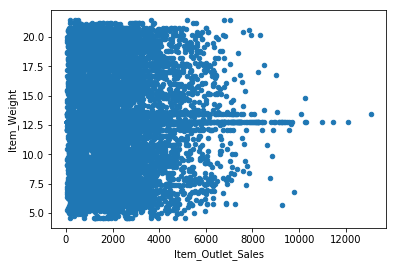

In [58]:
train1.plot(kind='scatter',y='Item_Weight',x='Item_Outlet_Sales')

In [59]:
train2=train1

In [60]:
train2['Outlet_Establishment_Year']=train2['Outlet_Establishment_Year'].astype(int).astype(object)

In [61]:
test2=test1

In [62]:
test2['Outlet_Establishment_Year']=test1['Outlet_Establishment_Year'].astype(int).astype(object)

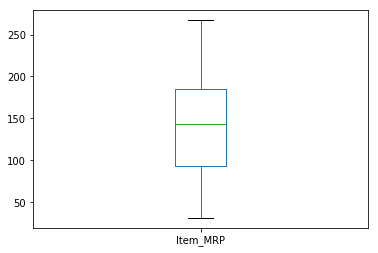

In [63]:
train2['Item_MRP'].plot(kind='box')

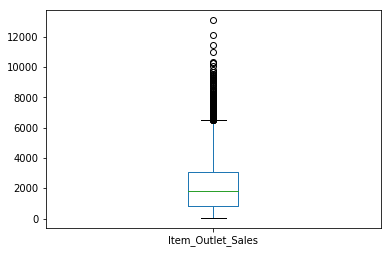

In [64]:
train2['Item_Outlet_Sales'].plot(kind='box')

# Cube Root Transformation of Dependent Variable

In [65]:
train2['Item_Outlet_Sales_CubeRoot']=train2['Item_Outlet_Sales']**(1/3)

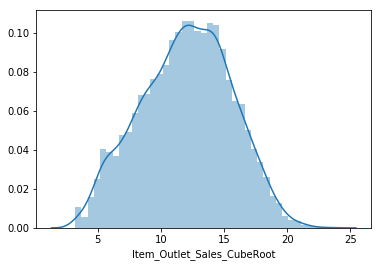

In [66]:
sns.distplot(train2['Item_Outlet_Sales_CubeRoot'])

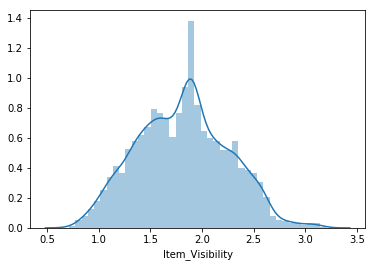

In [67]:
sns.distplot(train2['Item_Visibility']**(1/3))

In [68]:
train2['Item_Visibility'].isnull().sum()

0

In [69]:
#train2['Item_Visibility_Log']=np.log(train2['Item_Visibility'])

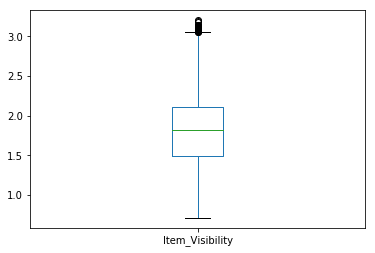

In [70]:
(train2['Item_Visibility']**(1/3)).plot(kind='box')

In [71]:
#train2.drop('Item_Visibility',axis=1,inplace=True)

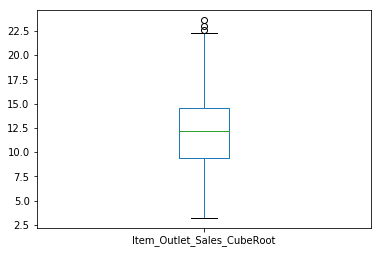

In [72]:
train2['Item_Outlet_Sales_CubeRoot'].plot(kind='box')

In [73]:
train2.drop('Item_Outlet_Sales',axis=1,inplace=True)

In [74]:
train2['Item_Outlet_Sales_CubeRoot'].mode()[0]

9.860571675988076

In [75]:
train3=train2

In [76]:
train3.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Identifier_Encoder,Outlet_Identifier_Encoder,Item_Type_New,Item_Outlet_Sales_CubeRoot
0,9.3,Low Fat,1.600000,249.8092,1999,Medium,Tier 1,Supermarket Type1,156,9,Food,15.515611
1,5.9,Regular,1.930000,48.2692,2009,Medium,Tier 3,Supermarket Type2,8,3,Drinks,7.625576
2,17.5,Low Fat,1.680000,141.6180,1999,Medium,Tier 1,Supermarket Type1,662,9,Food,12.800240
3,19.2,Regular,6.833141,182.0950,1998,Supermarket Type3,Tier 3,Grocery Store,1121,0,Food,9.013888
4,8.9,Low Fat,5.922314,53.8614,1987,High,Tier 3,Supermarket Type1,1297,1,Non-Consumption,9.982319


In [77]:
train4=train3.drop(['Item_Identifier_Encoder','Outlet_Identifier_Encoder'],axis=1)

In [78]:
test3=test2.drop(['Item_Identifier_Encoder','Outlet_Identifier_Encoder'],axis=1)

# Categorical and Numerical Split for Model Building

In [79]:
train2_cat=train4[train4.select_dtypes(include=np.object).columns.tolist()]

In [80]:
test2_cat=test3[test3.select_dtypes(include=np.object).columns.tolist()]

In [81]:
train2_cat.head()

,Item_Fat_Content,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_New
0,Low Fat,1999,Medium,Tier 1,Supermarket Type1,Food
1,Regular,2009,Medium,Tier 3,Supermarket Type2,Drinks
2,Low Fat,1999,Medium,Tier 1,Supermarket Type1,Food
3,Regular,1998,Supermarket Type3,Tier 3,Grocery Store,Food
4,Low Fat,1987,High,Tier 3,Supermarket Type1,Non-Consumption


In [82]:
train2_cat_dummies=pd.get_dummies(train2_cat)

In [83]:
test2_cat_dummies=pd.get_dummies(test2_cat)

In [84]:
train2_cat_dummies.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Establishment_Year_1985,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_New_Drinks,Item_Type_New_Food,Item_Type_New_Non-Consumption
0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0,1,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [85]:
test2_cat_dummies.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Establishment_Year_1985,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_New_Drinks,Item_Type_New_Food,Item_Type_New_Non-Consumption
0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
4,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0


In [86]:
train2_num=train4[train4.select_dtypes(include=np.number).columns.tolist()]

In [87]:
test2_num=test3[test3.select_dtypes(include=np.number).columns.tolist()]

In [88]:
train2_comb=pd.concat([train2_cat_dummies,train2_num],axis=1)

In [89]:
test2_comb=pd.concat([test2_cat_dummies,test2_num],axis=1)

In [90]:
train2_comb_indep=train2_comb.drop('Item_Outlet_Sales_CubeRoot',axis=1)
train2_comb_dep=train2_comb['Item_Outlet_Sales_CubeRoot']

# Train Test Split

In [91]:
x_train, x_test, y_train, y_test=train_test_split(train2_comb_indep,train2_comb_dep,train_size=0.7,random_state=100)

E:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# Performing Linear Regression

In [92]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Performing Ridge Regression

In [93]:
ridge=Ridge()

# Hyper Parameter Tuning

In [94]:
model_parameter={'alpha':[0.001,0.01,0.05,1,10,15,20,25,100],
                'normalize':[True,False]}

# Grid Search Cross Validation

In [95]:
gscv=GridSearchCV(estimator=ridge,
                 param_grid=model_parameter,
                 cv=5,
                 verbose=1,
                 n_jobs=-1)

In [96]:
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    7.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'alpha': [0.001, 0.01, 0.05, 1, 10, 15, 20, 25, 100], 'normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

# Checking Ridge Best Parameter

In [97]:
ridge1=Ridge(**gscv.best_params_)

In [98]:
ridge1

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [99]:
ridge1.fit(x_train,y_train)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

# Checking Coefficient with Linear Regression

In [100]:
coeff_df_lr= pd.DataFrame(lr.coef_,x_test.columns,columns=['Coefficient'])

In [101]:
coeff_df_lr

,Coefficient
Item_Fat_Content_Low Fat,-0.080255
Item_Fat_Content_Regular,0.080255
Outlet_Establishment_Year_1985,0.067116
Outlet_Establishment_Year_1987,-0.185860
Outlet_Establishment_Year_1997,1.364852
Outlet_Establishment_Year_1998,-1.064249
Outlet_Establishment_Year_1999,-0.257103
Outlet_Establishment_Year_2002,0.051606
Outlet_Establishment_Year_2004,0.162964
Outlet_Establishment_Year_2007,0.325444


# Predicting the training data with Linear Regression

In [102]:
y_pred_train_lr=lr.predict(x_test)

In [103]:
y_pred_train_lr

array([13.70819446, 16.29626117, 16.42388264, ...,  7.65185923,
       11.96748078, 10.81570885])

# Predicting the training data with Ridge Regression

In [104]:
y_pred_train_ridge=ridge1.predict(x_test)

In [105]:
y_pred_train_ridge

array([13.70631535, 16.29264993, 16.41995807, ...,  7.65252856,
       11.96818198, 10.81775561])

# Model Performance Metrics for Linear Regression

In [106]:
mse=mean_squared_error(y_pred_train_lr,y_test)
r_square=r2_score(y_pred_train_lr,y_test)
rmse=sqrt(mse)
print('Mean Square error',mse)
print('R Squared value',r_square)
print('Root Mean Square error',rmse)

Mean Square error 4.0828295394036465
R Squared value 0.5194945733421628
Root Mean Square error 2.020601281649511


# Model Performance Metrics for Ridge Regression

In [107]:
mse=mean_squared_error(y_pred_train_ridge,y_test)
r_square=r2_score(y_pred_train_ridge,y_test)
rmse=sqrt(mse)
print('Mean Square error',mse)
print('R Squared value',r_square)
print('Root Mean Square error',rmse)

Mean Square error 4.082751771336838
R Squared value 0.518773501574064
Root Mean Square error 2.020582037764574


# Predicting the test data with Linear Regression

In [108]:
y_pred_test_lr=lr.predict(test2_comb)

In [109]:
y_pred_test_lr_new=y_pred_test_lr**3

In [110]:
submit_lr=pd.read_csv('F:\Pratik\Big Mart Sales Hackathon//SampleSubmission_TmnO39y_Jw0L2VF.csv')
submit_lr['Item_Outlet_Sales']=y_pred_test_lr_new
submit_lr.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1558.593686
1,FDW14,OUT017,1363.268216
2,NCN55,OUT010,924.822418
3,FDQ58,OUT017,2245.794090
4,FDY38,OUT027,5753.107388


In [111]:
#submit_lr.to_csv('F:\Pratik\Big Mart Sales Hackathon//Submit_New_20200319.csv',index=False)

# Predicting the test data with Ridge Regression

In [112]:
y_pred_test_ridge=ridge1.predict(test2_comb)

In [113]:
y_pred_test_ridge_new=y_pred_test_ridge**3

# Generating Output File after Prediction

In [114]:
submit_ridge=pd.read_csv('F:\Pratik\Big Mart Sales Hackathon//SampleSubmission_TmnO39y_Jw0L2VF.csv')
submit_ridge['Item_Outlet_Sales']=y_pred_test_ridge_new
submit_ridge.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1559.248312
1,FDW14,OUT017,1363.875709
2,NCN55,OUT010,924.317884
3,FDQ58,OUT017,2245.649619
4,FDY38,OUT027,5747.815313


In [115]:
submit_ridge.to_csv('F:\Pratik\Big Mart Sales Hackathon//Submit_New_20200324_Ridge.csv',index=False)